# Exercise 4 - Regularization 
## PART 1

The goal of this exercise is to look at movie reviews and tell if the 
review is positive or negative (Binary classification)

 - Create a model with 3 fully connected layers. 
- The input layer must have #16 units, the hidden layer must have 16 units, and the output layer must have 1 unit

You can load the model with the following code
``NUM_WORDS = 10000

 (train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)``

To use the data with a fully connected network, you will have to one-hot-encode the data.

The following code does that for you
``def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)
``

**What accuracy do you get? 
Do you think this is good? 
What happens if you change the number of units?
Save your model**

## PART 2

Load your model again, and use ``model.evaluate`` to get the accuracy

- Try adding some **regularization**, can you increase the accuracy of the model?
- You can try adding dropout between some layers, where do you find it makes a difference?
- How about L2 regularization?
- Vary the number of: 
   - units
   - the amount of layers
   - activation functions
   - etc. 
   to obtain the best accuracy you can

## Loading Data

In [100]:
import tensorflow.keras as tfk
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 


NUM_WORDS = 10000
(train_data, train_labels), (test_data, test_labels) = tfk.datasets.imdb.load_data(num_words=NUM_WORDS)


## Decoding a review 

In [101]:
def decode_review(X):

    from tensorflow.keras.datasets import imdb

    # Let's quickly decode a review
    word_index = imdb.get_word_index()

    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

    decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in X])

    return decoded_review
decode_review(train_data[1])

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

## One hot encoding the reviews 

In [102]:
def multi_hot_sequences(sequences, dimension):
    #Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

#splitting the train_data into train AND validation data
train_data, validation_data, train_labels, validation_labels = train_test_split(train_data, train_labels, test_size =0.33, random_state=42)

# Decoding again after encoding 
decode_review(train_data[1])

'? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?

## Building the model

In [103]:
moviereview_model = tfk.Sequential()
moviereview_model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
moviereview_model.add(layers.Dropout(0.5)) #added this dropout layer to improve accuracy 
moviereview_model.add(layers.Dense(32, activation='relu', kernel_regularizer='l1')) #inserted regularizer l1 here 
moviereview_model.add(layers.Dense(32, activation='softmax', kernel_regularizer='l1')) # adding the bias regularizer slightly decreased accuracy
# moviereview_model.add(layers.Dropout(0.5)) #adding dropout here = more overfitting 
moviereview_model.add(layers.Dense(1, activation='sigmoid'))

#from original model: increased units pr layer 16-32, added dropout after input layer, added a third dense layer with softmax activation + weight regularizer l1

moviereview_model.compile(optimizer =optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

## Fitting  and saving the model

In [104]:
history = moviereview_model.fit(train_data, train_labels, batch_size=512, epochs=20, validation_data=(validation_data,validation_labels))
moviereview_model.save('ex4_moviereview_model_pre.h5')

Epoch 1/20
33/33 [==============================] - 1s 24ms/step - loss: 3.4232 - accuracy: 0.6642 - val_loss: 3.0626 - val_accuracy: 0.8035
Epoch 2/20
33/33 [==============================] - 1s 15ms/step - loss: 2.7901 - accuracy: 0.7550 - val_loss: 2.5012 - val_accuracy: 0.8064
Epoch 3/20
33/33 [==============================] - 0s 14ms/step - loss: 2.2676 - accuracy: 0.7744 - val_loss: 2.0172 - val_accuracy: 0.8131
Epoch 4/20
33/33 [==============================] - 1s 15ms/step - loss: 1.8162 - accuracy: 0.8026 - val_loss: 1.6046 - val_accuracy: 0.8359
Epoch 5/20
33/33 [==============================] - 0s 15ms/step - loss: 1.4357 - accuracy: 0.8149 - val_loss: 1.2595 - val_accuracy: 0.8439
Epoch 6/20
33/33 [==============================] - 0s 15ms/step - loss: 1.1228 - accuracy: 0.8355 - val_loss: 0.9852 - val_accuracy: 0.8570
Epoch 7/20
33/33 [==============================] - 0s 15ms/step - loss: 0.8868 - accuracy: 0.8507 - val_loss: 0.7921 - val_accuracy: 0.8588
Epoch 8/20
33

## Question: What accuracy do you get?
## Answer: 0.9983 (on training data) - really good but overfitting

## Plotting the model to illustrate overfitting 

49/49 [==============================] - 0s 6ms/step - loss: 0.5001 - accuracy: 0.8870

 evaluation results:  [0.5000724792480469, 0.8870000243186951]

 metrics:  ['loss', 'accuracy']


<function matplotlib.pyplot.show(*args, **kw)>

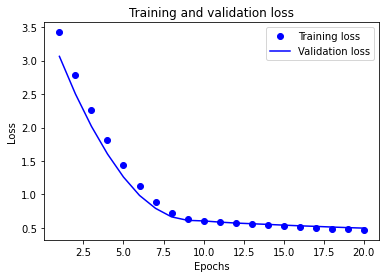

In [105]:
history_dict = history.history

results = moviereview_model.evaluate(test_data, test_labels, batch_size=512)
print("\n metrics: ", moviereview_model.metrics_names)
print("\n evaluation results: ",results)


loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+ 1)

# Plot properties 
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show